# Module 1 Implementation [Analyzing brain images]

### Team members [Team 5]:

- Adwaith mohan
- Aswanth Anoop
- Abin Chandran
- Pranav Ajay
- Rohith Sujith

#### initializing fast surfer

In [1]:
import os
import sys
from os.path import exists, join, basename, splitext

print("Starting setup. This could take a few minutes")
print("----------------------------------------------")

is_google_colab = "colab.research.google.com" in str(os.environ)
if is_google_colab:
    SETUP_DIR = "/content/"
else:
    SETUP_DIR = os.environ["HOME"] + "/fastsurfer_tutorial/"

!mkdir -p "{SETUP_DIR}"
%cd "{SETUP_DIR}"

print(f"Using {SETUP_DIR} to store files.")

print("Downloading FastSurfer")
print("----------------------------------------------")


git_repo_url = 'https://github.com/deep-mi/fastsurfer.git'
project_name = splitext(basename(git_repo_url))[0]
FASTSURFER_HOME = SETUP_DIR + project_name + "/"
if not exists(project_name):
  # clone and install dependencies
  ! git clone -q --branch stable $git_repo_url
  ! pip install -r $FASTSURFER_HOME/requirements.txt
sys.path.append(FASTSURFER_HOME)


print("Installing required packages")
print("----------------------------------------------")

! pip install torchio==0.18.83
! pip install yacs==0.1.8
! pip install plotly==5.9.0

print("Finished setup")
print("----------------------------------------------")

Starting setup. This could take a few minutes
----------------------------------------------
/content
Using /content/ to store files.
----------------------------------------------
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 790.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.3/183.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 5.2 MB/s eta 0:00:00
     ━

Installing required packages
----------------------------------------------
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 39.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.18.0
    Uninstalling plotly-5.18.0:
      Successfully uninstalled plotly-5.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
Finished setup
----------------------------------------------


Downloading and testing a sample image

In [2]:
!curl -k https://surfer.nmr.mgh.harvard.edu/pub/data/tutorial_data/buckner_data/tutorial_subjs/140/mri/orig.mgz -o "{SETUP_DIR}140_orig.mgz"
img = f"{SETUP_DIR}140_orig.mgz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4664k  100 4664k    0     0  5606k      0 --:--:-- --:--:-- --:--:-- 5605k


Using pretrained fastsurfer cnn for segmentation

In [ ]:
! FASTSURFER_HOME=$FASTSURFER_HOME \
  $FASTSURFER_HOME/run_fastsurfer.sh --t1 $img \
                                     --sd "{SETUP_DIR}fastsurfer_seg" \
                                     --sid Tutorial \
                                     --seg_only --py python3 \
                                     --allow_root

Version: 2.2.0+a000faa
Tue Jan 16 07:18:02 AM UTC 2024

python3 /content/fastsurfer//FastSurferCNN/run_prediction.py --t1 /content/140_orig.mgz --asegdkt_segfile /content/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.mgz --conformed_name /content/fastsurfer_seg/Tutorial/mri/orig.mgz --brainmask_name /content/fastsurfer_seg/Tutorial/mri/mask.mgz --aseg_name /content/fastsurfer_seg/Tutorial/mri/aseg.auto_noCCseg.mgz --sid Tutorial --seg_log /content/fastsurfer_seg/Tutorial/scripts/deep-seg.log --vox_size min --batch_size 1 --viewagg_device auto --device auto --allow_root
[INFO: run_prediction.py:  546]: Checking or downloading default checkpoints ...
[INFO: common.py:  111]: Using device: cpu
[INFO: run_prediction.py:  234]: Running view aggregation on cpu
[INFO: inference.py:  200]: Loading checkpoint /content/fastsurfer/checkpoints/aparc_vinn_coronal_v2.0.0.pkl
[INFO: inference.py:  200]: Loading checkpoint /content/fastsurfer/checkpoints/aparc_vinn_sagittal_v2.0.0.pkl
[INFO: in

### Plotting

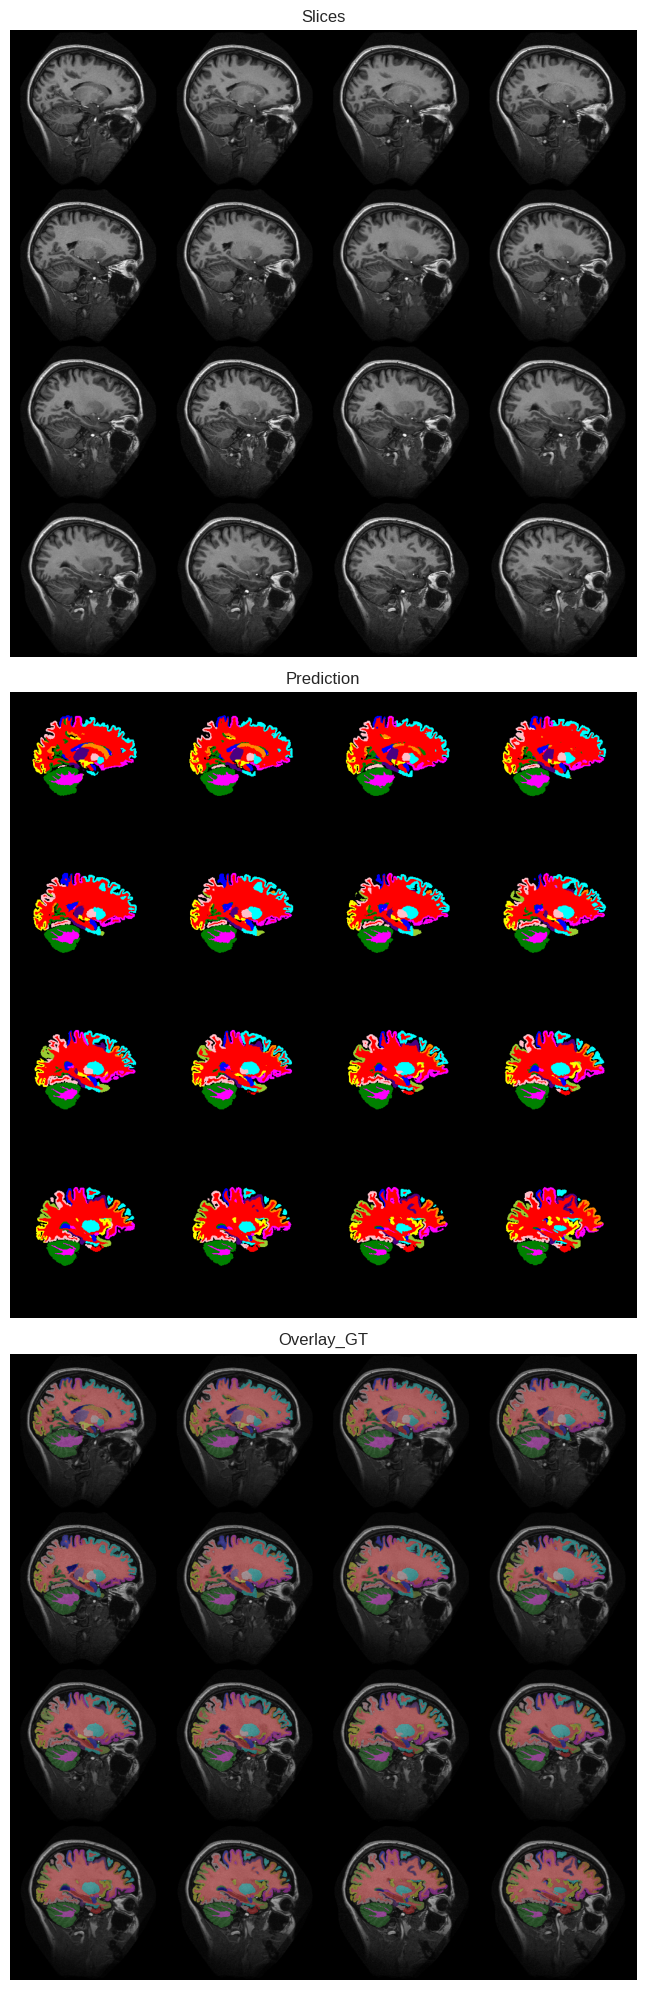

In [ ]:
%matplotlib inline
import nibabel as nib
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
from skimage import color
import torch
import numpy as np
from torchvision import utils

def plot_predictions(image, pred):


    f = plt.figure(figsize=(20, 20))
    n, h, w = image.shape

    mid_slice = n // 2
    image = torch.from_numpy(np.expand_dims(image[mid_slice+16:mid_slice+32, :, :], 1))
    grid = utils.make_grid(image, nrow=4)

    plt.subplot(311)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title('Slices')

    grid2 = utils.make_grid(torch.from_numpy(np.expand_dims(pred[mid_slice+16:mid_slice+32, ...], 1)), nrow=4)[0]
    color_grid = color.label2rgb(grid2.numpy(), bg_label=0)
    plt.subplot(312)
    plt.imshow(color_grid)
    plt.title('Prediction')

    plt.subplot(313)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.imshow(color_grid, alpha=0.3)
    plt.title('Overlay_GT')

    for ax in f.axes:
      ax.grid(visible=None)
      ax.axis("off")
    plt.tight_layout()

    plt.show()

orig_data = nib.load(img).get_fdata() / 255
pred_data = nib.load('/content/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.mgz').get_fdata()
plot_predictions(orig_data, pred_data)

### Brain 3d analysis

In [ ]:
from ipywidgets import widgets
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
#from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure

pred_data = nib.load('/content/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.mgz').get_fdata()

labels = [
'Lateral-Ventricle',
'Inf-Lat-Vent',
'Cerebellum-White-Matter',
'Cerebellum-Cortex',
'Thalamus-Proper',
'Caudate',
'Putamen',
'Pallidum',
'3rd-Ventricle',
'4th-Ventricle',
'Brain-Stem',
'Hippocampus',
'Amygdala',
'CSF',
'Accumbens-area',
'VentralDC',
'choroid-plexus',
'caudalanteriorcingulate',
'caudalmiddlefrontal',
'cuneus',
'entorhinal',
'fusiform',
'inferiorparietal',
'inferiortemporal',
'isthmuscingulate',
'lateraloccipital',
'lateralorbitofrontal',
'lingual',
'medialorbitofrontal',
'middletemporal',
'parahippocampal',
'paracentral',
'parsopercularis',
'parsorbitalis',
'parstriangularis',
'pericalcarine',
'postcentral',
'posteriorcingulate',
'precentral',
'precuneus',
'rostralanteriorcingulate',
'rostralmiddlefrontal',
'superiorfrontal',
'superiorparietal',
'superiortemporal',
'supramarginal',
'transversetemporal',
'insula']

labels_lookup = {
'Left-Lateral-Ventricle': 4,
'Left-Inf-Lat-Vent': 5,
'Left-Cerebellum-White-Matter': 7,
'Left-Cerebellum-Cortex': 8,
'Left-Thalamus-Proper': 10,
'Left-Caudate': 11,
'Left-Putamen': 12,
'Left-Pallidum': 13,
'Left-3rd-Ventricle': 14,
'Left-4th-Ventricle': 15,
'Left-Brain-Stem': 16,
'Left-Hippocampus': 17,
'Left-Amygdala': 18,
'Left-CSF': 24,
'Left-Accumbens-area': 26,
'Left-VentralDC': 28,
'Left-choroid-plexus': 31,
'Right-Lateral-Ventricle': 43,
'Right-Inf-Lat-Vent': 44,
'Right-Cerebellum-White-Matter': 46,
'Right-Cerebellum-Cortex': 47,
'Right-Thalamus-Proper': 49,
'Right-Caudate': 50,
'Right-Putamen': 51,
'Right-Pallidum': 52,
'Right-Hippocampus': 53,
'Right-Amygdala': 54,
'Right-Accumbens-area': 58,
'Right-VentralDC': 60,
'Right-choroid-plexus': 63,
'Right-3rd-Ventricle': 14,
'Right-4th-Ventricle': 15,
'Right-Brain-Stem': 16,
'Right-CSF': 24,
'ctx-lh-caudalanteriorcingulate': 1002,
'ctx-lh-caudalmiddlefrontal': 1003,
'ctx-lh-cuneus': 1005,
'ctx-lh-entorhinal': 1006,
'ctx-lh-fusiform': 1007,
'ctx-lh-inferiorparietal': 1008,
'ctx-lh-inferiortemporal': 1009,
'ctx-lh-isthmuscingulate': 1010,
'ctx-lh-lateraloccipital': 1011,
'ctx-lh-lateralorbitofrontal': 1012,
'ctx-lh-lingual': 1013,
'ctx-lh-medialorbitofrontal': 1014,
'ctx-lh-middletemporal': 1015,
'ctx-lh-parahippocampal': 1016,
'ctx-lh-paracentral': 1017,
'ctx-lh-parsopercularis': 1018,
'ctx-lh-parsorbitalis': 1019,
'ctx-lh-parstriangularis': 1020,
'ctx-lh-pericalcarine': 1021,
'ctx-lh-postcentral': 1022,
'ctx-lh-posteriorcingulate': 1023,
'ctx-lh-precentral': 1024,
'ctx-lh-precuneus': 1025,
'ctx-lh-rostralanteriorcingulate': 1026,
'ctx-lh-rostralmiddlefrontal': 1027,
'ctx-lh-superiorfrontal': 1028,
'ctx-lh-superiorparietal': 1029,
'ctx-lh-superiortemporal': 1030,
'ctx-lh-supramarginal': 1031,
'ctx-lh-transversetemporal': 1034,
'ctx-lh-insula': 1035,
'ctx-rh-caudalanteriorcingulate': 2002,
'ctx-rh-caudalmiddlefrontal': 2003,
'ctx-rh-cuneus': 2005,
'ctx-rh-entorhinal': 2006,
'ctx-rh-fusiform': 2007,
'ctx-rh-inferiorparietal': 2008,
'ctx-rh-inferiortemporal': 2009,
'ctx-rh-isthmuscingulate': 2010,
'ctx-rh-lateraloccipital': 2011,
'ctx-rh-lateralorbitofrontal': 2012,
'ctx-rh-lingual': 2013,
'ctx-rh-medialorbitofrontal': 2014,
'ctx-rh-middletemporal': 2015,
'ctx-rh-parahippocampal': 2016,
'ctx-rh-paracentral': 2017,
'ctx-rh-parsopercularis': 2018,
'ctx-rh-parsorbitalis': 2019,
'ctx-rh-parstriangularis': 2020,
'ctx-rh-pericalcarine': 2021,
'ctx-rh-postcentral': 2022,
'ctx-rh-posteriorcingulate': 2023,
'ctx-rh-precentral': 2024,
'ctx-rh-precuneus': 2025,
'ctx-rh-rostralanteriorcingulate': 2026,
'ctx-rh-rostralmiddlefrontal': 2027,
'ctx-rh-superiorfrontal': 2028,
'ctx-rh-superiorparietal': 2029,
'ctx-rh-superiortemporal': 2030,
'ctx-rh-supramarginal': 2031,
'ctx-rh-transversetemporal': 2034,
'ctx-rh-insula': 2035}

def label_lookups(structure, hemi):
  # determine what to plot
  if structure[0].isupper():
    if hemi == "left":
      label = labels_lookup["Left-" + structure]
    elif hemi == "right":
      label = labels_lookup["Right-" + structure]
    else:
      label = [labels_lookup["Left-" + structure], labels_lookup["Right-" + structure]]
  else:
    if hemi == "left":
      label = labels_lookup["ctx-lh-" + structure]
    elif hemi == "right":
      label = labels_lookup["ctx-rh-" + structure]
    else:
      label = [labels_lookup["ctx-lh-" + structure], labels_lookup["ctx-rh-" + structure]]
  return label

@widgets.interact_manual(
    hemisphere=['left', 'right', 'both'], structure=labels)
def plot_3d_plotly_shape(structure, hemisphere, show_mesh=True, crop=True, grid=True):
  import plotly.graph_objects as go
  label = label_lookups(structure, hemisphere)
  test_cond = np.in1d(pred_data, label).reshape(pred_data.shape)
  roi = np.where(test_cond, 1, 0)
  vert_p, faces_p, normals_p, values_p = measure.marching_cubes(roi, 0, spacing=(1, 1, 1))

  fig = go.Figure(data=[go.Mesh3d(
        x=vert_p[:, 0],
        y=vert_p[:, 1],
        z=vert_p[:, 2],
        # i, j and k give the vertices of triangles
        # here we represent the 4 triangles of the tetrahedron surface
        i=faces_p[:, 0],
        j=faces_p[:, 1],
        k=faces_p[:, 2],
        name='y',
        showscale=True
    )]
  )

  if show_mesh:
    #plot surface triangulation
    tri_vertices = vert_p[faces_p]
    Xe = []
    Ye = []
    Ze = []

    for T in tri_vertices:
      Xe += [T[k%3][0] for k in range(4)] + [ None]
      Ye += [T[k%3][1] for k in range(4)] + [ None]
      Ze += [T[k%3][2] for k in range(4)] + [ None]

    fig.add_trace(go.Scatter3d(x=Xe,
                     y=Ye,
                     z=Ze,
                     mode='lines',
                     name='',
                     line=dict(color= 'rgb(40,40,40)', width=0.5)))
  if crop:
    scale_min = np.min(vert_p, axis=0)
    scale_max = np.max(vert_p, axis=0)
  else:
    scale_min = [0, 0, 0]
    scale_max = pred_data.shape
  fig.update_layout(
    scene = dict(aspectratio=dict(x=1, y=1, z=1),
        xaxis = dict(range=[scale_min[0], scale_max[0]], visible=grid),
        yaxis = dict(range=[scale_min[1], scale_max[1]], visible=grid),
        zaxis = dict(range=[scale_min[2], scale_max[2]], visible=grid),)
    )

  fig.show()

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

### Trying out different pretrained models on mri scan data

In [ ]:
from fastai.vision.all import *

In [ ]:
path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset"
size = 224
bs = 64

In [ ]:
data = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                get_y=parent_label,
                item_tfms=Resize(224),
                batch_tfms=aug_transforms())